# Prompt

## Try It: Comparing Feature Selection Methods

In this module, you have seen two ways to select features.  The first approach is using sequential feature selection to sequentially add or delete features and only use those that improve the model.  The second approach is using a regularized model to identify features based on non-zero coefficients.  This activity focuses on comparing variations of both these methods.  

You will use both the `SequentialFeatureSelection` and `RFE` (recursive feature elimination) to build and compare regression models.  Consider the following feature selection methods -- leave all other arguments to default besides the `estimator` and `n_features_to_select` arguments:

- `Ridge` regressor to extract coefficients
- `SequentialFeatureSelection` using the `Lasso` to select 4 features.
- `RFE` using `Lasso` to select 4 features.

For each of these, fit the training data `X_train`, `y_train` below.  Compare the magnitude of the results of your `Ridge` model to those that result from feature selection methods.  

## Data Description

For this problem a dataset with information on red wine chemical compositions and their quality is given.  Your goal is to use the properties of the wine to predict the quality.  Below, the data is loaded and train/test splits constructed.

# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import warnings
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.feature_selection import SequentialFeatureSelector, RFE

In [2]:
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
mpl.rcParams.update({"axes.grid": True})

# Data Load

In [3]:
df = pd.read_csv("./data/wine-quality-red.csv")

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Model Prep

## Feature Naming

In [6]:
target_feature = "quality"
numeric_features = df.columns[df.dtypes != "object"].to_list()
numeric_features.remove(target_feature)

## Perform a Default Split

<Axes: >

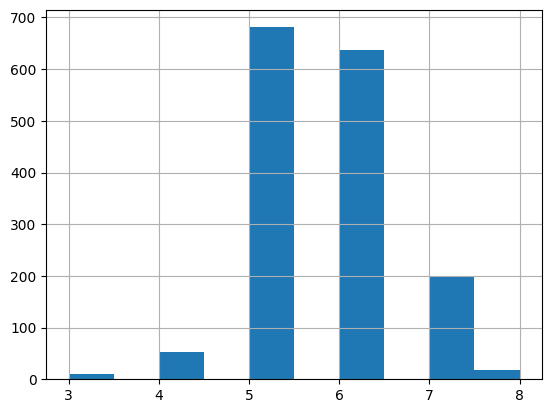

In [7]:
X = df[numeric_features]
y = df[target_feature]
y.hist()

In [8]:
(X_train, X_dev, y_train, y_dev) = train_test_split(X, y, random_state=42)

# Regression

## Ridge

Little bit confused by the prompt... do they really want just a trivial pipeline here?

In [9]:
ridge_estimator = Ridge().fit(X_train, y_train)

## Sequential Feature Selection with Lasso

### SFS handicraft

In [10]:
phi_remaining = numeric_features.copy()
phi_selected = []
num_features_to_keep = 4

for k in range(num_features_to_keep):
    print(
        "\nFeature Addition Round %d, testing now = %d\n\tRemaining features = %s\n\tSelected features = %s"
        % (k + 1, len(phi_remaining), phi_remaining, phi_selected)
    )

    mse_dev_best = np.Inf
    feature_best = ""

    for phi_candidate in phi_remaining:
        test_features = phi_selected + [phi_candidate]
        model = Lasso().fit(X_train[test_features], y_train)
        mse_train = mean_squared_error(y_train, model.predict(X_train[test_features]))
        mse_dev = mean_squared_error(y_dev, model.predict(X_dev[test_features]))
        # print(
        #     "\t\tTest features = %s, MSE train, development = (%.2f, %.2f)"
        #     % (test_features, mse_train, mse_dev)
        # )
        if mse_dev < mse_dev_best:
            mse_dev_best = mse_dev
            feature_best = phi_candidate

    phi_selected.append(feature_best)
    phi_remaining.remove(feature_best)

    print("\tSelecting feature '%s' with best MSE %.2f" % (feature_best, mse_dev_best))

print(
    "\nEnd State dev MSE = %.2f:\n\tRemaining features = %s\n\tSelected features = %s"
    % (mse_dev_best, phi_remaining, phi_selected)
)


Feature Addition Round 1, testing now = 11
	Remaining features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
	Selected features = []
	Selecting feature 'total sulfur dioxide' with best MSE 0.62

Feature Addition Round 2, testing now = 10
	Remaining features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
	Selected features = ['total sulfur dioxide']
	Selecting feature 'fixed acidity' with best MSE 0.62

Feature Addition Round 3, testing now = 9
	Remaining features = ['volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
	Selected features = ['total sulfur dioxide', 'fixed acidity']
	Selecting feature 'volatile acidity' with best MSE 0.62

Feature Addition Round 4, testing now = 8
	Rem

### SFS from sklearn

In [11]:
n_features_to_select = 4
sfs = SequentialFeatureSelector(
    estimator=Lasso(),
    n_features_to_select=n_features_to_select,
).fit(X_train, y_train)

sfs_feature_data = pd.DataFrame(
    sfs.fit_transform(X_train, y_train),
    columns=sfs.get_feature_names_out(),
)

display(sfs_feature_data.head())

,fixed acidity,volatile acidity,citric acid,total sulfur dioxide
0,11.7,0.490,0.49,15.0
1,8.8,0.600,0.29,15.0
2,7.1,0.590,0.00,14.0
3,8.3,0.540,0.24,112.0
4,9.3,0.775,0.27,56.0


## Recursive Feature Elimination with Lasso

In [12]:
n_features_to_select = 4
rfe = RFE(
    estimator=Lasso(),
    n_features_to_select=n_features_to_select,
).fit(X_train, y_train)

rfe_feature_data = pd.DataFrame(
    rfe.fit_transform(X_train, y_train),
    columns=rfe.get_feature_names_out(),
)

display(rfe_feature_data.head())

,total sulfur dioxide,pH,sulphates,alcohol
0,15.0,3.19,0.43,9.2
1,15.0,3.36,0.49,9.1
2,14.0,3.42,0.55,11.5
3,112.0,3.27,0.61,9.4
4,56.0,3.31,0.67,10.6


## Comparing Coefficients

In [13]:
feature_sets = [X_train, sfs_feature_data, rfe_feature_data]
feature_set_names = ["All", "SFS with Lasso", "RFE with Lasso"]

for k in range(len(feature_sets)):
    estimator = Ridge().fit(feature_sets[k], y_train)
    print(
        "Ridge Fit with Feature Set from %s:\n\tFeatures Used = %s\n\tIntercept = %.2f\n\tCoefs = %s\n\tScore = %.2f"
        % (
            feature_set_names[k],
            estimator.feature_names_in_,
            estimator.intercept_,
            str(estimator.coef_.round(2)),
            estimator.score(feature_sets[k], y_train),
        )
    )

Ridge Fit with Feature Set from All:
	Features Used = ['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol']
	Intercept = 3.82
	Coefs = [ 0.01 -1.03 -0.16  0.   -1.18  0.01 -0.   -0.01 -0.36  0.72  0.31]
	Score = 0.35
Ridge Fit with Feature Set from SFS with Lasso:
	Features Used = ['fixed acidity' 'volatile acidity' 'citric acid' 'total sulfur dioxide']
	Intercept = 6.67
	Coefs = [-0.01 -1.5   0.19 -0.  ]
	Score = 0.17
Ridge Fit with Feature Set from RFE with Lasso:
	Features Used = ['total sulfur dioxide' 'pH' 'sulphates' 'alcohol']
	Intercept = 3.26
	Coefs = [-0.   -0.52  0.78  0.36]
	Score = 0.29
